In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
df = pd.read_csv('sonar/sonar.all-data', header = None)
df=df.replace('R',0)
df=df.replace('M',1)
data=df.values
from sklearn.model_selection import train_test_split
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(data[:,0:60],data[:,60], test_size=test_size, random_state=seed)


y_train = tf.one_hot(y_train,10)
y_test = tf.one_hot(y_test,10)
sess1=tf.Session()
y_train, y_test = sess1.run([y_train,y_test])

x_Train4D=X_train.reshape(X_train.shape[0],6,10,1).astype('float32')
x_Test4D=X_test.reshape(X_test.shape[0],6,10,1).astype('float32')
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=16,
                 kernel_size=(2,2),
                 padding='same',
                 input_shape=(6,10,1), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Conv2D(filters=36,
                 kernel_size=(2,2),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


In [3]:
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
class Metrics(Callback):
    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(self.validation_data[0]))).round()
        val_targ = self.validation_data[1]
        _val_f1 = f1_score(val_targ, val_predict,average='micro')
        _val_recall = recall_score(val_targ, val_predict,average='micro')
        _val_precision = precision_score(val_targ, val_predict,average='micro')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        print (" — val_f1: %f — val_precision: %f — val_recall %f" %(_val_f1, _val_precision, _val_recall))
        return

In [4]:
metrics = Metrics()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_train,validation_split=0.2, callbacks=[metrics],
                        epochs=300, batch_size=300,verbose=2,validation_data=(x_Test4D_normalize,y_test))

Train on 139 samples, validate on 69 samples
Epoch 1/300
 - 1s - loss: 2.3026 - accuracy: 0.0288 - val_loss: 2.2936 - val_accuracy: 0.5507
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 2/300
 - 0s - loss: 2.2937 - accuracy: 0.5036 - val_loss: 2.2771 - val_accuracy: 0.5507


E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 3/300
 - 0s - loss: 2.2779 - accuracy: 0.5324 - val_loss: 2.2515 - val_accuracy: 0.5507
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 4/300
 - 0s - loss: 2.2533 - accuracy: 0.4604 - val_loss: 2.2146 - val_accuracy: 0.5507
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 5/300
 - 0s - loss: 2.2148 - accuracy: 0.4676 - val_loss: 2.1652 - val_accuracy: 0.5507
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 6/300
 - 0s - loss: 2.1642 - accuracy: 0.5540 - val_loss: 2.1018 - val_accuracy: 0.5507
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 7/300
 - 0s - loss: 2.1035 - accuracy: 0.5252 - val_loss: 2.0229 - val_accuracy: 0.5507
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 8/300
 - 0s - loss: 2.0261 - accuracy: 0.4820 - val_loss: 1.9280 - val_accuracy: 0.5507
 — val_f1: 0.000000 — val_pr

 - 0s - loss: 0.7217 - accuracy: 0.5252 - val_loss: 0.6911 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 54/300
 - 0s - loss: 0.7123 - accuracy: 0.5540 - val_loss: 0.6914 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 55/300
 - 0s - loss: 0.7139 - accuracy: 0.5396 - val_loss: 0.6920 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 56/300
 - 0s - loss: 0.7570 - accuracy: 0.4173 - val_loss: 0.6928 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 57/300
 - 0s - loss: 0.7221 - accuracy: 0.4892 - val_loss: 0.6935 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 58/300
 - 0s - loss: 0.7093 - accuracy: 0.5612 - val_loss: 0.6940 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 59/300
 - 0s - loss: 0.7024 -

 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 104/300
 - 0s - loss: 0.7068 - accuracy: 0.4892 - val_loss: 0.6905 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 105/300
 - 0s - loss: 0.6923 - accuracy: 0.5612 - val_loss: 0.6904 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 106/300
 - 0s - loss: 0.7012 - accuracy: 0.5036 - val_loss: 0.6902 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 107/300
 - 0s - loss: 0.6953 - accuracy: 0.5396 - val_loss: 0.6897 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 108/300
 - 0s - loss: 0.6973 - accuracy: 0.4820 - val_loss: 0.6891 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 109/300
 - 0s - loss: 0.6805 - accuracy: 0.5755 - val_loss: 0.6887 - val_accuracy: 0.5507
 — val_f1: 0.550

 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 154/300
 - 0s - loss: 0.7121 - accuracy: 0.4820 - val_loss: 0.6895 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 155/300
 - 0s - loss: 0.7033 - accuracy: 0.4388 - val_loss: 0.6893 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 156/300
 - 0s - loss: 0.6985 - accuracy: 0.5180 - val_loss: 0.6892 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 157/300
 - 0s - loss: 0.6986 - accuracy: 0.5252 - val_loss: 0.6890 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 158/300
 - 0s - loss: 0.6964 - accuracy: 0.5036 - val_loss: 0.6890 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 159/300
 - 0s - loss: 0.6922 - accuracy: 0.4604 - val_loss: 0.6890 - val_accuracy: 0.5507
 — val_f1: 0.550

 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 204/300
 - 0s - loss: 0.6865 - accuracy: 0.5827 - val_loss: 0.6899 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 205/300
 - 0s - loss: 0.6954 - accuracy: 0.5180 - val_loss: 0.6897 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 206/300
 - 0s - loss: 0.7025 - accuracy: 0.4964 - val_loss: 0.6898 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 207/300
 - 0s - loss: 0.7033 - accuracy: 0.4964 - val_loss: 0.6897 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 208/300
 - 0s - loss: 0.7117 - accuracy: 0.4173 - val_loss: 0.6895 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 209/300
 - 0s - loss: 0.6922 - accuracy: 0.5468 - val_loss: 0.6894 - val_accuracy: 0.5507
 — val_f1: 0.550

 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 254/300
 - 0s - loss: 0.6994 - accuracy: 0.4820 - val_loss: 0.6893 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 255/300
 - 0s - loss: 0.6975 - accuracy: 0.5036 - val_loss: 0.6893 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 256/300
 - 0s - loss: 0.6851 - accuracy: 0.5540 - val_loss: 0.6892 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 257/300
 - 0s - loss: 0.6963 - accuracy: 0.5036 - val_loss: 0.6892 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 258/300
 - 0s - loss: 0.6975 - accuracy: 0.5252 - val_loss: 0.6893 - val_accuracy: 0.5507
 — val_f1: 0.550725 — val_precision: 0.550725 — val_recall 0.550725
Epoch 259/300
 - 0s - loss: 0.6949 - accuracy: 0.5108 - val_loss: 0.6893 - val_accuracy: 0.5507
 — val_f1: 0.550

In [5]:
# 构造绘图函数
from matplotlib import pyplot as plt
def drow(history):
    epochs = range(1, len(history['loss']) + 1)
    plt.plot(epochs, history['loss'], 'rx', label='Training loss')
    plt.plot(epochs, history['val_loss'], 'b', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

#     plt.imsave('E:/acc_and_loss/Training and Validation loss.jpg')

    plt.figure()
    epochs = range(1, len(history['accuracy']) + 1)
    plt.plot(epochs, history['accuracy'], 'rx', label='Training acc')
    plt.plot(epochs, history['val_accuracy'], 'b', label='validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('acc')
    plt.legend()

#     plt.imsave('E:/acc_and_loss/Training and validation acc.jpg')
    plt.show()

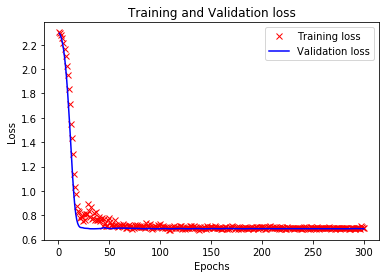

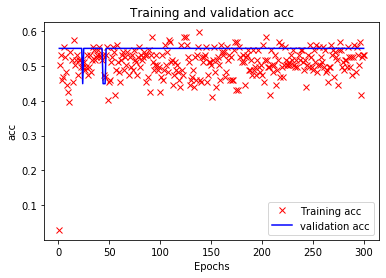

In [6]:
drow(train_history.history)

In [9]:
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# 显示混淆矩阵
def plot_confuse(model, x_val, y_val):
    predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1))



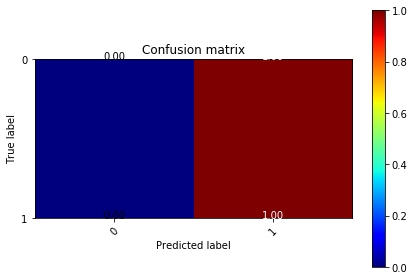

In [10]:
plot_confuse(model, x_Test4D_normalize, y_test)